In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\CODEINE\AppData\Local\Temp\ipykernel_7848\3140943007.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#loading data
df = pd.read_csv("Flyzy Flight Cancellation.csv")

In [4]:
df.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0


In [5]:
df.tail()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
2995,1265781,Airline D,395,Airport 2,Airport 3,0,6,1,Type B,0.190018,1.00000,2.451216,0.283440,1
2996,5440150,Airline E,547,Airport 1,Airport 4,22,4,7,Type E,0.719271,91.00000,0.027039,0.665294,1
2997,779080,Airline C,461,Airport 1,Airport 3,8,3,1,Type B,0.458724,3.00000,1.131315,0.991307,0
2998,4044431,Airline B,464,Airport 3,Airport 3,5,5,3,Type E,0.443373,46.00000,0.968651,0.254808,1
2999,2806578,Airline A,369,Airport 1,Airport 2,1,1,10,Type A,0.704563,18.66667,1.879411,0.532486,1


In [6]:
df.shape

(3000, 14)

In [7]:
df.columns

Index(['Flight ID', 'Airline', 'Flight_Distance', 'Origin_Airport',
       'Destination_Airport', 'Scheduled_Departure_Time', 'Day_of_Week',
       'Month', 'Airplane_Type', 'Weather_Score',
       'Previous_Flight_Delay_Minutes', 'Airline_Rating', 'Passenger_Load',
       'Flight_Cancelled'],
      dtype='object')

Observation: Most of the column names consist of multiple words seperated by underscores,but 'Flight ID' does not
follow this format, therefore we need to change it to keep consistancy.

In [8]:
#Changing column name 
df.rename(columns={'Flight ID' : 'Flight_ID'}, inplace =True)

In [9]:
df.head(2)

,Flight_ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1


**CHECKING DATA TYPES OF EACH COLUMN**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight_ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

**Observation: This results indicate that all columns have the correct data types according to the data they contain**

In [11]:
df.describe()

,Flight_ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.997429e+06,498.909333,11.435000,3.963000,6.381000,0.524023,26.793383,2.317439,0.515885,0.690667
std,2.868139e+06,98.892266,6.899298,2.016346,3.473979,0.290694,27.874733,1.430386,0.295634,0.462296
min,3.681000e+03,138.000000,0.000000,1.000000,1.000000,0.000965,0.000000,0.000103,0.001039,0.000000
25%,2.520313e+06,431.000000,6.000000,2.000000,3.000000,0.278011,7.000000,1.092902,0.265793,0.000000
50%,5.073096e+06,497.000000,12.000000,4.000000,6.000000,0.522180,18.000000,2.126614,0.517175,1.000000
75%,7.462026e+06,566.000000,17.000000,6.000000,9.000000,0.776323,38.000000,3.525746,0.770370,1.000000
max,9.999011e+06,864.000000,23.000000,7.000000,12.000000,1.099246,259.000000,5.189038,1.123559,1.000000


In [12]:
#Checking for duplicates entries 
duplicates = df[df.duplicated()]

In [13]:
duplicates

,Flight_ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled


No duplicates on the dataset

**CHECKING FOR MISSING VALUES**

In [14]:
df.isnull().sum()

Flight_ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64

**There are no missing values**

**CHECKING FOR OUTLIERS**

In [15]:
#Used boxplot to visually check outliers

In [16]:
columns_to_check =['Flight_Distance',
          'Scheduled_Departure_Time',
          'Weather_Score',
          'Previous_Flight_Delay_Minutes', 
          'Airline_Rating', 'Passenger_Load',
          'Flight_Cancelled'
         ]

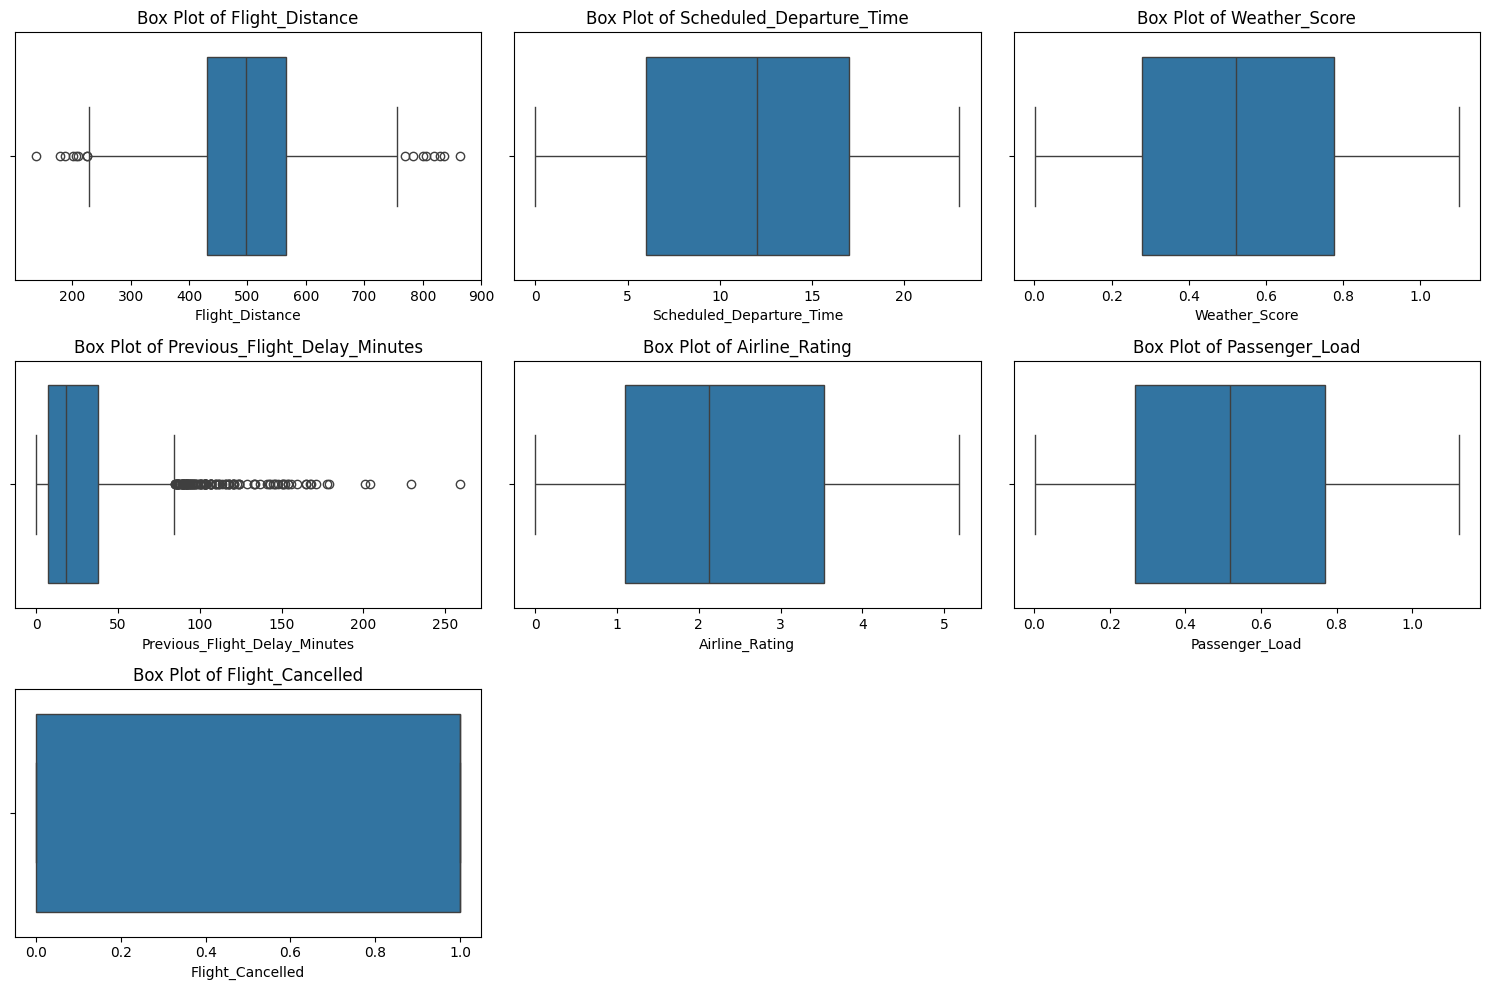

In [17]:
plt.figure(figsize =(15,10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3,3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

This plots shows that the following columns have outliers and have to be handled 
1. Flight_Distance
2. Previous_Flight_Delay_Minutes

1. Handling outliers for Flight_Distance column using Capping method 
Because it reduces the impact of extreme outliers, which can distort the analysis.

In [18]:
#Handling outliers on Flight Distance using Capping approach 

#applying threshold
cap_max = df['Flight_Distance'].quantile(0.95)
cap_min =df['Flight_Distance'].quantile(0.05)
#Apply capping
df['Capped_Flight_Distance'] = np.clip(df['Flight_Distance'], cap_min, cap_max)


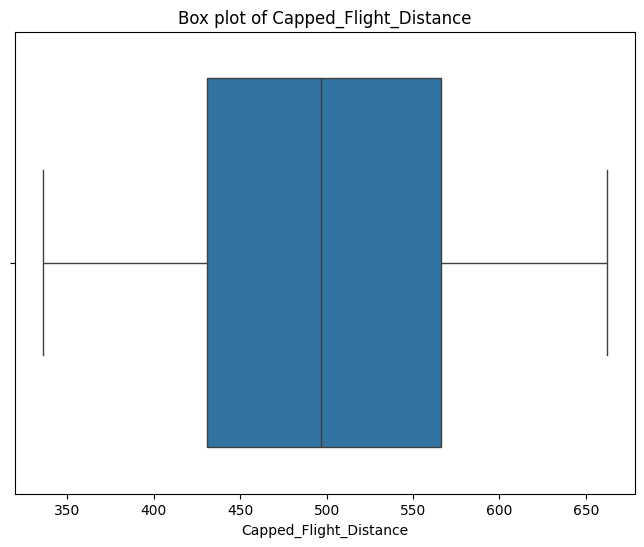

In [19]:
#Plotting transformed column
plt.figure(figsize =(8,6))
sns.boxplot(x=df['Capped_Flight_Distance'])
plt.title('Box plot of Capped_Flight_Distance')
plt.show()

**The results shows no more outliers for Flight_Distance**

2. Handling Outliers for Previous_Flight_Delay_Minutes Using Log Transformation
because data is skewed,  compressing the range of delay times, reducing the impact of extreme values.

In [20]:
#creating a new column and applying the log
df['Log_Previous_Flight_Delay_Minutes'] = np.log1p(df['Previous_Flight_Delay_Minutes'])

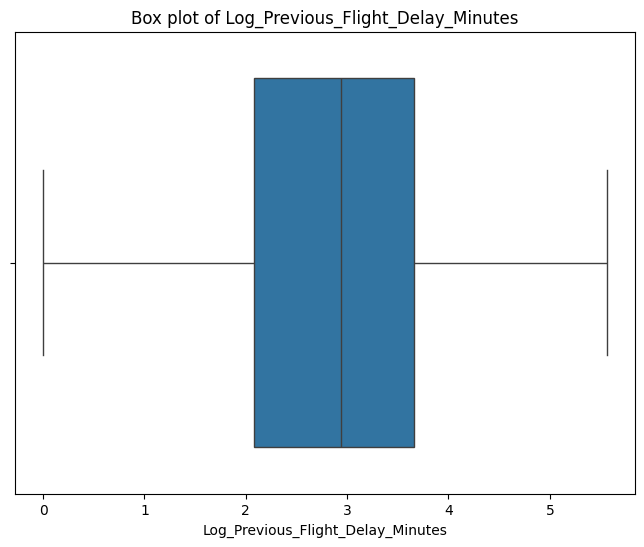

In [21]:
#Plotting transformed column
plt.figure(figsize =(8,6))
sns.boxplot(x=df['Log_Previous_Flight_Delay_Minutes'])
plt.title('Box plot of Log_Previous_Flight_Delay_Minutes')
plt.show()

**Now the outliers were handled and not showing on the plot**

In [22]:
df.head(2)

,Flight_ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled,Capped_Flight_Distance,Log_Previous_Flight_Delay_Minutes
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0,475,1.791759
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1,538,4.234107


**Preprocessing and Model Building**

**Encoding and Feature Scaling**

In [80]:
#Cyclical data Month and Day of Week
df['Day_of_Week_sin'] =np.sin(2*np.pi *df['Day_of_Week']/7)
df['Day_of_Week_cos'] =np.cos(2*np.pi *df['Day_of_Week']/7)
df['Months_sin'] = np.sin(2*np.pi*df['Month'] /12)
df['Months_cos'] = np.cos(2*np.pi*df['Month'] /12)

df.drop(['Day_of_Week','Month'], axis =1).head()

,Flight_ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled,Capped_Flight_Distance,Log_Previous_Flight_Delay_Minutes,Day_of_Week_sin,Day_of_Week_cos,Months_sin,Months_cos
0,7319483,Airline D,475,Airport 3,Airport 2,4,Type C,0.225122,5.0,2.151974,0.477202,0,475,1.791759,-7.818315e-01,0.623490,5.000000e-01,8.660254e-01
1,4791965,Airline E,538,Airport 5,Airport 4,12,Type B,0.060346,68.0,1.600779,0.159718,1,538,4.234107,7.818315e-01,0.623490,1.224647e-16,-1.000000e+00
2,2991718,Airline C,565,Airport 1,Airport 2,17,Type C,0.093920,18.0,4.406848,0.256803,0,565,2.944439,4.338837e-01,-0.900969,-1.000000e+00,-1.836970e-16
3,4220106,Airline E,658,Airport 5,Airport 3,1,Type B,0.656750,13.0,0.998757,0.504077,1,658,2.639057,7.818315e-01,0.623490,-8.660254e-01,-5.000000e-01
4,2263008,Airline E,566,Airport 2,Airport 2,19,Type E,0.505211,4.0,3.806206,0.019638,0,566,1.609438,-2.449294e-16,1.000000,-2.449294e-16,1.000000e+00


In [82]:
#One hot encoding for categorial variables
categorical_columns =['Airline', 'Origin_Airport', 'Destination_Airport','Airplane_Type']
df_encoded =pd.get_dummies(df, columns =categorical_columns, drop_first =True)

In [88]:
df_encoded.head()

,Flight_ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled,...,Origin_Airport_Airport 3,Origin_Airport_Airport 4,Origin_Airport_Airport 5,Destination_Airport_Airport 3,Destination_Airport_Airport 4,Destination_Airport_Airport 5,Airplane_Type_Type B,Airplane_Type_Type C,Airplane_Type_Type D,Airplane_Type_Type E
0,7319483,475,4,6,1,0.225122,5.0,2.151974,0.477202,0,...,True,False,False,False,False,False,False,True,False,False
1,4791965,538,12,1,6,0.060346,68.0,1.600779,0.159718,1,...,False,False,True,False,True,False,True,False,False,False
2,2991718,565,17,3,9,0.093920,18.0,4.406848,0.256803,0,...,False,False,False,False,False,False,False,True,False,False
3,4220106,658,1,1,8,0.656750,13.0,0.998757,0.504077,1,...,False,False,True,True,False,False,True,False,False,False
4,2263008,566,19,7,12,0.505211,4.0,3.806206,0.019638,0,...,False,False,False,False,False,False,False,False,False,True


In [89]:
#Numerical columns to scale
numerical_features = [ 'Weather_Score','Scheduled_Departure_Time', 'Airline_Rating',
       'Passenger_Load', 'Capped_Flight_Distance',
       'Log_Previous_Flight_Delay_Minutes','Flight_Distance','Previous_Flight_Delay_Minutes']
#apply standard scaler
from sklearn.preprocessing import StandardScaler
#initialise standard scaler
scaler =StandardScaler()

#apply scaler
df_encoded[numerical_features]= scaler.fit_transform(df_encoded[numerical_features])

In [90]:
df_encoded.head()

,Flight_ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled,...,Origin_Airport_Airport 3,Origin_Airport_Airport 4,Origin_Airport_Airport 5,Destination_Airport_Airport 3,Destination_Airport_Airport 4,Destination_Airport_Airport 5,Airplane_Type_Type B,Airplane_Type_Type C,Airplane_Type_Type D,Airplane_Type_Type E
0,7319483,-0.241812,-1.077826,6,1,-1.028402,-0.781963,-0.115698,-0.130868,0,...,True,False,False,False,False,False,False,True,False,False
1,4791965,0.395351,0.081906,1,6,-1.595333,1.478525,-0.501109,-1.204954,1,...,False,False,True,False,True,False,True,False,False,False
2,2991718,0.668421,0.806738,3,9,-1.479818,-0.315513,1.460975,-0.876504,0,...,False,False,False,False,False,False,False,True,False,False
3,4220106,1.608995,-1.512725,1,8,0.456663,-0.494917,-0.922060,-0.039946,1,...,False,False,True,True,False,False,True,False,False,False
4,2263008,0.678535,1.096671,7,12,-0.064724,-0.817844,1.040989,-1.678862,0,...,False,False,False,False,False,False,False,False,False,True


**Splitting the data**

In [91]:
#splitting the data
from sklearn.model_selection import train_test_split

#Dropping original columns (to use only the transformed ones) and also target column
X =df_encoded.drop(['Flight_Cancelled', 'Flight_ID','Flight_Distance','Previous_Flight_Delay_Minutes','Month','Day_of_Week'], axis= 1)

#Target variable
y = df_encoded['Flight_Cancelled']

#Splitting the data
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size =0.2, random_state =42)

In [92]:
X.head()

,Scheduled_Departure_Time,Weather_Score,Airline_Rating,Passenger_Load,Capped_Flight_Distance,Log_Previous_Flight_Delay_Minutes,Day_of_Week_sin,Day_of_Week_cos,Months_sin,Months_cos,...,Origin_Airport_Airport 3,Origin_Airport_Airport 4,Origin_Airport_Airport 5,Destination_Airport_Airport 3,Destination_Airport_Airport 4,Destination_Airport_Airport 5,Airplane_Type_Type B,Airplane_Type_Type C,Airplane_Type_Type D,Airplane_Type_Type E
0,-1.077826,-1.028402,-0.115698,-0.130868,-0.264674,-0.907351,-7.818315e-01,0.623490,5.000000e-01,8.660254e-01,...,True,False,False,False,False,False,False,True,False,False
1,0.081906,-1.595333,-0.501109,-1.204954,0.428930,1.270054,7.818315e-01,0.623490,1.224647e-16,-1.000000e+00,...,False,False,True,False,True,False,True,False,False,False
2,0.806738,-1.479818,1.460975,-0.876504,0.726189,0.120288,4.338837e-01,-0.900969,-1.000000e+00,-1.836970e-16,...,False,False,False,False,False,False,False,True,False,False
3,-1.512725,0.456663,-0.922060,-0.039946,1.750081,-0.151967,7.818315e-01,0.623490,-8.660254e-01,-5.000000e-01,...,False,False,True,True,False,False,True,False,False,False
4,1.096671,-0.064724,1.040989,-1.678862,0.737199,-1.069895,-2.449294e-16,1.000000,-2.449294e-16,1.000000e+00,...,False,False,False,False,False,False,False,False,False,True


In [93]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Flight_Cancelled, dtype: int64

**Model Building**

In [117]:
#Iporting Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

In [118]:
#create lr model
lr =LogisticRegression()

#train the model using training data
lr.fit(X_train,y_train)

#predict
y_pred = lr.predict(X_test)

**Model Evaluation**

In [119]:
#Confusion matrix
metrics.confusion_matrix(y_test,y_pred)

array([[102,  85],
       [ 55, 358]], dtype=int64)

In [120]:
accuracy =accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.77


In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.55      0.59       187
           1       0.81      0.87      0.84       413

    accuracy                           0.77       600
   macro avg       0.73      0.71      0.71       600
weighted avg       0.76      0.77      0.76       600



In [122]:
#roc_auc
roc_auc_score(y_test,y_pred)

0.7061413163108079

[0.         0.45454545 1.        ]
[0.         0.86682809 1.        ]
[inf  1.  0.]
0.7061413163108079


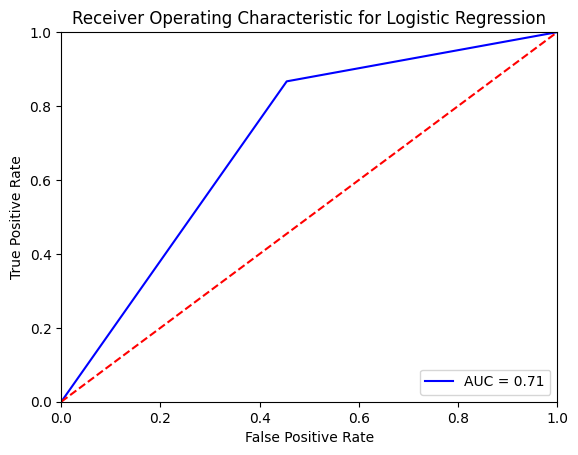

In [123]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# method I: plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Our model achived an accuracy of 77%, we can try other classification methods to see how they perform**

**Example : Testing random Forest classifier**

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

In [125]:

randm=RandomForestClassifier(max_depth=5)

In [126]:
print(cross_val_score(randm, X_train, y_train, cv=5).mean())

0.9708333333333334


In [127]:
randm.fit(X_train,y_train)
ypred1=randm.predict(X_test)

In [128]:
metrics.confusion_matrix(y_test,ypred1)

array([[186,   1],
       [  8, 405]], dtype=int64)

In [129]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       187
           1       1.00      0.98      0.99       413

    accuracy                           0.98       600
   macro avg       0.98      0.99      0.98       600
weighted avg       0.99      0.98      0.99       600



**This model already shows high accuracy than the logistic regression we used.**

**We will further explore other models.**